In [384]:
import pandas as pd
from pandas import DataFrame, TimeSeries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [385]:
df = pd.read_excel("zg-averages-data.xlsx")
df.tail()

,year,mon,avg
547,1996,8,20.7
548,1996,9,14.1
549,1996,10,12.2
550,1996,11,8.3
551,1996,12,-0.9


In [386]:
type (df["year"])

pandas.core.series.Series

In [387]:
df["year"].tail()

547    1996
548    1996
549    1996
550    1996
551    1996
Name: year, dtype: int64

In [388]:
df.year.tail()

547    1996
548    1996
549    1996
550    1996
551    1996
Name: year, dtype: int64

In [389]:
df1 = df[ df.year < 1980 ]
df2 = df1[df1.year>=1970]
df2.tail()

,year,mon,avg
343,1979,8,18.6
344,1979,9,15.9
345,1979,10,9.8
346,1979,11,6.1
347,1979,12,4.4


In [390]:
all ( df.avg <0)

False

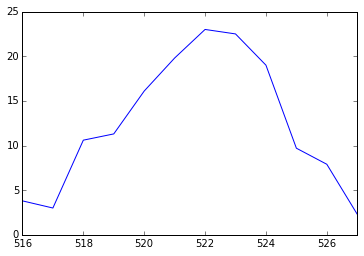

In [391]:
yr1994 = df[ df.year == 1994].avg
yr1994.plot()

In [392]:
i=1
[np.mean(df[df.mon == i].avg) for i in range(1,13)]


[-0.3152173913043479,
 1.7021739130434788,
 6.091304347826088,
 10.691304347826089,
 15.263043478260872,
 18.700000000000003,
 20.436956521739127,
 19.882608695652173,
 16.210869565217397,
 10.845652173913043,
 5.489130434782608,
 1.191304347826087]

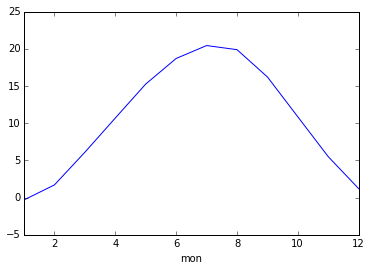

In [393]:
df.groupby("mon").aggregate(np.mean).avg.plot()

In [394]:
df.corr()

,year,mon,avg
year,1.000000,0.000000,0.028486
mon,0.000000,1.000000,0.204373
avg,0.028486,0.204373,1.000000


In [395]:
df [ ["mon","avg"] ].corr()

,mon,avg
mon,1.000000,0.204373
avg,0.204373,1.000000


In [396]:
sf = df [ ["mon","avg"] ]
sf[ sf.mon < 7].corr()


,mon,avg
mon,1.000000,0.951534
avg,0.951534,1.000000


In [397]:
sf[ sf.mon > 7].corr()

,mon,avg
mon,1.000000,-0.971219
avg,-0.971219,1.000000


In [398]:
df.head()

,year,mon,avg
0,1951,1,2.9
1,1951,2,5.0
2,1951,3,6.2
3,1951,4,11.1
4,1951,5,15.6


In [399]:
prosjeci = df.groupby("mon").aggregate(np.mean).avg.values
prosjeci[0]
def f_odst(m,a):
    return (a-prosjeci[i-1])


In [400]:
f_odst(m=1,a=2.9) 

3.215217391304348

In [401]:
df.odst = f_odst(m = df.mon, a =df.avg)
df["oddst"] = f_odst(m = df.mon, a =df.avg)
df.head()

,year,mon,avg,oddst
0,1951,1,2.9,3.215217
1,1951,2,5.0,5.315217
2,1951,3,6.2,6.515217
3,1951,4,11.1,11.415217
4,1951,5,15.6,15.915217


In [402]:
df["novi_stupac"] = 0

del df["novi_stupac"]

In [403]:
df.columns=["YEAR","MON","AVG","ODST"]
df.head()

,YEAR,MON,AVG,ODST
0,1951,1,2.9,3.215217
1,1951,2,5.0,5.315217
2,1951,3,6.2,6.515217
3,1951,4,11.1,11.415217
4,1951,5,15.6,15.915217


In [404]:
nvec = np.arange(1,100)

In [405]:
def f(x):
    return x+2

In [406]:
b = f(nvec)
b

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101])

In [407]:
fv = np.vectorize(f)

In [408]:
fv(nvec)

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101])

In [410]:
df["AVG_F"] = 0
df.head()

df.AVG_F = 1.8 * df.AVG + 32
df.head()

,YEAR,MON,AVG,ODST,AVG_F
0,1951,1,2.9,3.215217,37.22
1,1951,2,5.0,5.315217,41.00
2,1951,3,6.2,6.515217,43.16
3,1951,4,11.1,11.415217,51.98
4,1951,5,15.6,15.915217,60.08


In [419]:
df[df.MON == 1].AVG.min(), df[df.MON == 7].AVG.max()

(-7.0, 23.0)